## Challenge: If a tree falls in the forest 

Random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

- Pick a dataset. Build the best decision tree you can.

- Now try to match that with the simplest random forest you can. How do the accuracies of the two models compare?

- Measure simplicity with runtime. Compare the runtime of the decision tree and the Random Forest.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as t
import sklearn.ensemble
%matplotlib inline 

In [110]:
mushroom = pd.read_csv('mushrooms.csv')

In [111]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [112]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [113]:
mushroom.isnull().sum()  # no null values yay!

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [114]:
mushroom.shape  # 23 variables, 8124 rows

(8124, 23)

In [115]:
#for col in mushroom.columns:
#    mush_col = mushroom[col].unique().tolist()
##
#for col in mushroom_enc.columns:
#    mush_enc_col = mushroom_enc[col].unique().tolist()
#
#lst = zip(mush_col, mush_enc_col)
#for values in lst.v: 
#    print(values)

In [116]:
# This dataset has all values in string, we are going to convert them to numeric. 

from sklearn.preprocessing import LabelEncoder  # LE is an utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
labelencoder = LabelEncoder()

mush_enc = pd.DataFrame()
#le_name_mapping = {}
for col in mushroom.columns:
    #labelencoder.fit_transform(mushroom[col])
    # use fit_transform if you are not interested in inversse transform -- use fit and transform separately instead
    # see: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
    
    mush_enc[col] = labelencoder.fit_transform(mushroom[col])
#    labelencoder.transform(mushroom[col])
    le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))  # to get the mapping of the values
    print(col, le_name_mapping)
    
# note "?" in stalk-root

class {'e': 0, 'p': 1}
cap-shape {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
cap-surface {'f': 0, 'g': 1, 's': 2, 'y': 3}
cap-color {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
bruises {'f': 0, 't': 1}
odor {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-attachment {'a': 0, 'f': 1}
gill-spacing {'c': 0, 'w': 1}
gill-size {'b': 0, 'n': 1}
gill-color {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
stalk-shape {'e': 0, 't': 1}
stalk-root {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
stalk-surface-above-ring {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-surface-below-ring {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-color-above-ring {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
stalk-color-below-ring {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
veil-type {'p': 0}
veil-color {'n': 0, 'o': 1, 'w': 2, 'y': 3}
ring-number {'n': 0, 'o': 1

In [117]:
# Actual dataset with string values

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [118]:
# Dataset with numerical values 

mush_enc.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [119]:
print(mushroom.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [76]:
# Creating subsets on the basis of mushroom characteristics 

mush_cap = mush_enc[['cap-shape', 'cap-surface', 'cap-color']]
mush_gill = mush_enc[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
mush_stalk = mush_enc[['stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring']]
mush_veil = mush_enc[['veil-type', 'veil-color']]
mush_demo = mush_enc[['bruises', 'odor','population', 'habitat']]

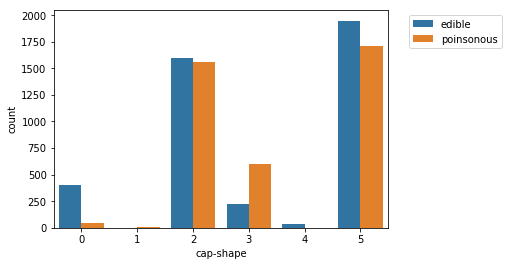

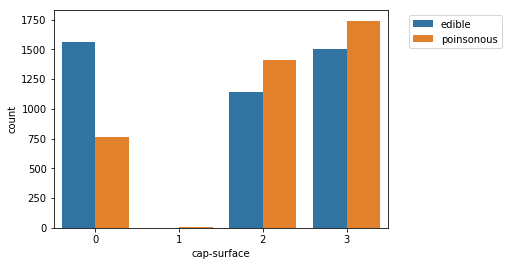

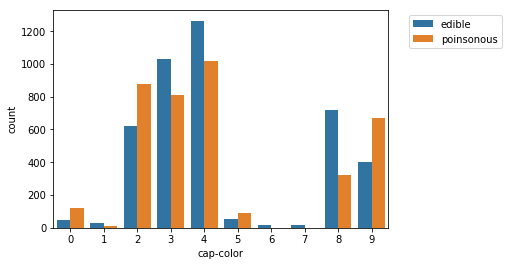

In [132]:
# Visualizing edible and poisonouns mushrooms wrt cap properties

for col in mush_cap.columns:

    sns.countplot(x= col,hue=mush_enc['class'], data=mush_cap)
    plt.xlabel
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()




#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
## Plot a simple histogram with binsize determined automatically
#sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
#
## Plot a kernel density estimate and rug plot
#sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
#
## Plot a filled kernel density estimate
#sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
#
## Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])
#
#plt.setp(axes, yticks=[])
#plt.tight_layout()
#

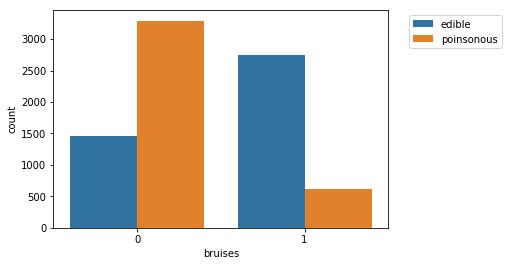

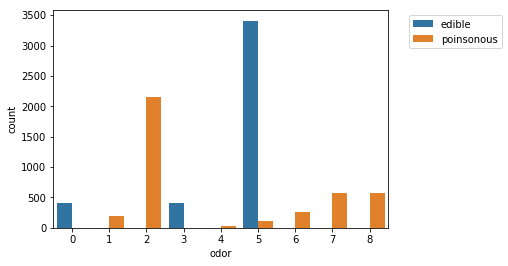

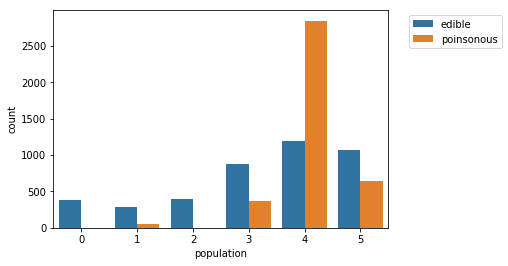

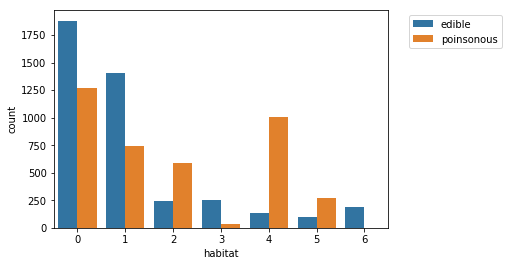

In [134]:
# Visualizing edible and poisonouns mushrooms wrt demographic properties

for col in mush_demo.columns:

    sns.countplot(x= col,hue=mush_enc['class'], data=mush_demo)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()


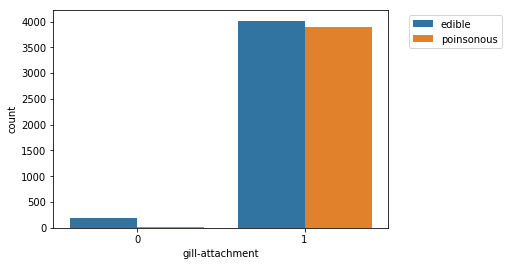

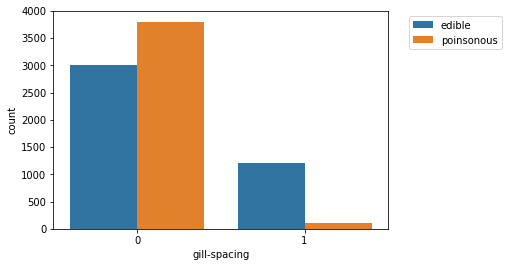

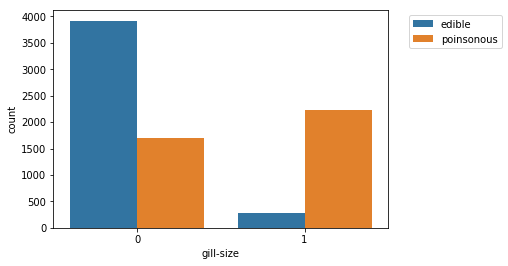

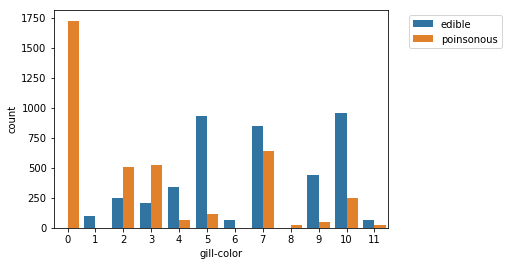

In [135]:
# Visualizing edible and poisonouns mushrooms wrt gill properties

for col in mush_gill.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_gill)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()


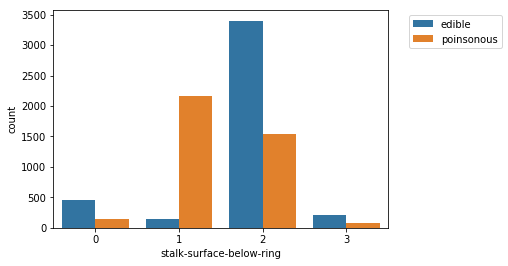

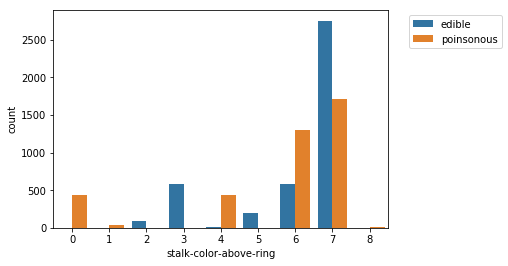

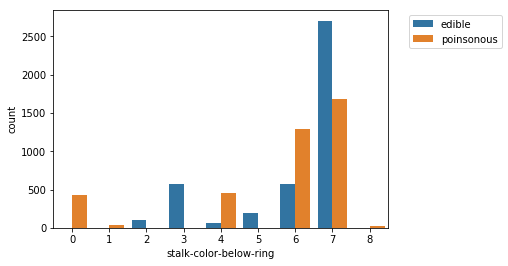

In [136]:
# Visualizing edible and poisonouns mushrooms wrt stack properties

for col in mush_stalk.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_stalk)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

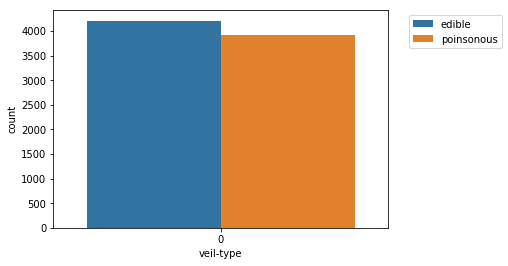

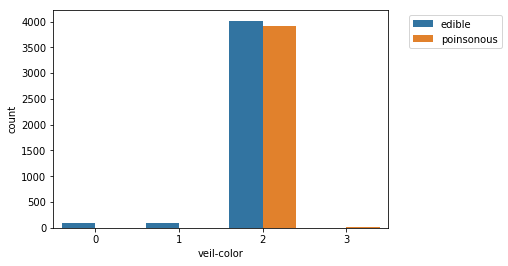

In [137]:
# Visualizing edible and poisonouns mushrooms wrt veil properties

for col in mush_veil.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_veil)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

Not quite sure if the visualizations are providing any information here. 
Let's move on to the models 

### Decision Tree Classifier and Random Forest 

In [150]:
# First get the X and the y out 

X = mush_enc.drop('class', axis=1)
y = mush_enc['class']

print(X.shape, y.shape)

(8124, 22) (8124,)


In [144]:
# Training and test datasets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(5686, 22) (5686,) (2438, 22) (5686,)


In [183]:
# Decision Tree classifier -- Default 

from sklearn import tree

decTree = tree.DecisionTreeClassifier()

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())

Accuracy score:  0.95
Confusion Matrix:  [[17  1]
 [ 1 21]]
Crossvalidated accuracy  0.9133333333333334


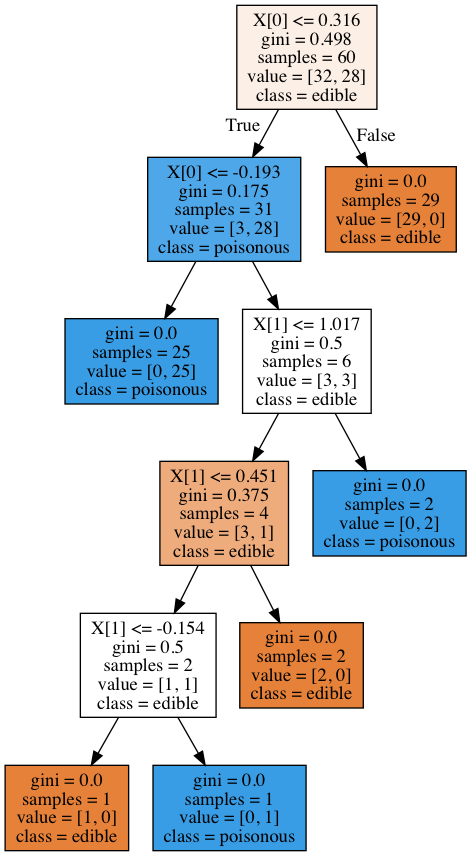

In [185]:
import graphviz
import pydotplus
from IPython.display import Image

# Render tree 
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [186]:
# With a custom decision tree - tuning parameters - criterion entropy, max_feature = sqrt of n_ftr, 
# max_depth gives better accuracy with 5,


decTree1 = tree.DecisionTreeClassifier(criterion='entropy', max_features='sqrt', 
                                      max_depth=5, random_state=1)

decTree1.fit(X_train, y_train)
tree_pred = decTree1.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy: ', cross_val_score(decTree1, X_train, y_train, cv=10).mean())

Accuracy score:  0.925
Confusion Matrix:  [[18  0]
 [ 3 19]]
Crossvalidated accuracy:  0.9133333333333334


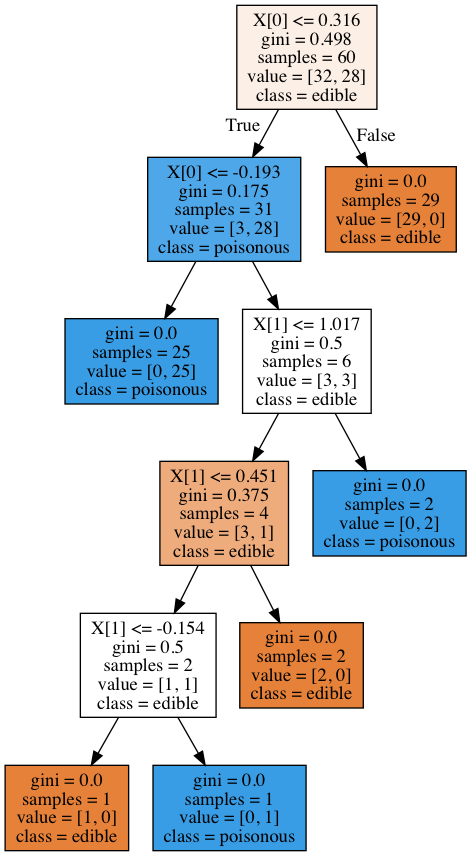

In [187]:
# Render tree 
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [189]:
# Trying Random Forest - default RF

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest, X_train, y_train, cv=10).mean())


Accuracy score:  0.95
Confusion Matrix:  [[18  0]
 [ 2 20]]
Crossvalidated accuracy:  0.93


In [191]:
# Trying Random Forest - tuning parameters - imitating tuned parameters in the decision tree model

from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=5, criterion='entropy', 
                                 max_features='sqrt')

forest1.fit(X_train, y_train)
y_pred = forest1.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest1, X_train, y_train, cv=10).mean())


Accuracy score:  0.95
Confusion Matrix:  [[18  0]
 [ 2 20]]
Crossvalidated accuracy:  0.9166666666666667


In [195]:
## Trying this hyperparameter tuning from Kaggle

model_RF=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
    

In [196]:
# Applying gridSearch 

from sklearn.grid_search import RandomizedSearchCV

RF_model= RandomizedSearchCV(model_RF, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [197]:
RF_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [198]:
print(RF_model.grid_scores_)

[mean: 0.53333, std: 0.04295, params: {'n_estimators': 30, 'min_samples_leaf': 40, 'max_features': 'log2'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 60, 'min_samples_leaf': 70, 'max_features': 'log2'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 90, 'min_samples_leaf': 50, 'max_features': 'auto'}, mean: 0.91667, std: 0.11180, params: {'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 40, 'min_samples_leaf': 60, 'max_features': 'auto'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 70, 'min_samples_leaf': 70, 'max_features': 'auto'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 50, 'min_samples_leaf': 70, 'max_features': 'auto'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 20, 'min_samples_leaf': 90, 'max_features': 'log2'}, mean: 0.53333, std: 0.04295, params: {'n_estimators': 80, 'min_samples_leaf': 40, 'max_features': 'auto'}, mean: 0.53333, std: 0.04295, params:

In [199]:
print(RF_model.best_score_)

0.9166666666666666


In [200]:
print(RF_model.best_params_)

{'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}


In [205]:
y_pred_model = RF_model.predict(X_test)
print('Accuracy: ', RF_model.score(X_test, y_pred_model))
print('Confustion Matrix: ', confusion_matrix(y_test, y_pred_model))
print('AUC-ROC: ', sklearn.metrics.classification_report(y_test, y_pred_model))
print('AUC-ROC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred_model))

Accuracy:  1.0
Confustion Matrix:  [[18  0]
 [ 2 20]]
AUC-ROC:               precision    recall  f1-score   support

          0       0.90      1.00      0.95        18
          1       1.00      0.91      0.95        22

avg / total       0.96      0.95      0.95        40

AUC-ROC score:  0.9545454545454546
